In [1]:
import rishi_utils as ru
import importlib
importlib.reload(ru)
from rdkit import Chem
import fall20_mse_8803 as retro
importlib.reload(retro)

<module 'fall20_mse_8803' from '/home/rgur/py_scripts/fall20_mse_8803.py'>

***I need to fix sg_possible to only fragment bonds which appear in the main chain***

# Test frp_possible

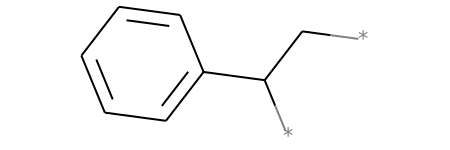

In [2]:
m = Chem.MolFromSmiles('*CC(*)c1ccccc1')
m

In [3]:
em = Chem.EditableMol(m)

In [ ]:
em.AddAtom(Chem.AtomFromSmiles('C'))

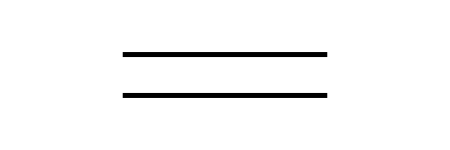

In [3]:
m2 = Chem.MolFromSmiles('C=C')
m2

In [4]:
patt = Chem.MolFromSmiles('*CC*')

In [5]:
frp_possible(m) #should be True

True

In [6]:
frp_possible(m2) #should be False

False

In [7]:
m3 = Chem.MolFromSmiles('[*]C1Nc2ccc(C)cc2C1C1NCC2C([*])C(C)CC21')
frp_possible(m3) #should be False

False

In [8]:
m4 = Chem.MolFromSmiles('*CC(*)c1cccc(C=C)c1')
frp_possible(m4) #should be False

False

# Run frp_possible on paper results

In [9]:
success = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/new_polymers_12_43PM_on_June_23_2020_sortedObjective.csv')
success.head()

,SMILES,Bandgap,CIB,Tg,Epoch,ID,afp_C3_C3_C3,afp_C3_C3_C4,afp_C3_C3_H1,afp_C3_C3_N3,...,mfp_MQNs40,mfp_MQNs41,mfp_MQNs42,mfp_NumAliphaticRings,mfp_NumAromaticRings,mfp_tpsa,Uniqueness,n_atoms,main_chain_len,Objective
0,[*]C1C2CCC1C1CC([*])(C)CC21,6.309,3.722,505.582,0,ID_4593,0.0,0.0,0.0,0.0,...,0.0,0.185,0.111,0.111,0.0,0.000,0.566667,27,6.0,0.020390
1,[*]C1CC2CC1C1CC([*])(C)CC21,6.390,3.722,504.867,0,ID_198,0.0,0.0,0.0,0.0,...,0.0,0.185,0.111,0.111,0.0,0.000,0.457143,27,6.0,0.016218
2,[*]C1CCC2CC(OC(=O)O)C([*])C1O2,6.578,3.305,576.055,1,ID_2955,0.0,0.0,0.0,0.0,...,0.0,0.120,0.080,0.080,0.0,0.558,0.422222,25,4.0,0.015142
3,[*]C([*])(C)C1CCCC(C)C1,6.467,3.895,485.356,1,ID_1424,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.040,0.0,0.000,0.678571,25,2.0,0.012242
4,[*]C1CC2CC1C(C([*])OC(=O)O)C2,6.708,3.198,531.194,1,ID_1515,0.0,0.0,0.0,0.0,...,0.0,0.125,0.083,0.083,0.0,0.485,0.447368,24,5.0,0.012222


In [10]:
len(success)

3556

In [11]:
smiles_ls = success['SMILES'].tolist()
inds = [x for x in smiles_ls if frp_possible(x)]
inds

['[*]C(OC(=O)O)C1([*])CC2CCC1C2',
 '[*]C(C(N)=O)C([*])C(C)CN',
 '[*]C1C(OC(=O)O)CC2CCCC1([*])O2',
 '[*]C1C2CCC(C2)C1([*])COC(=O)O',
 '[*]C1CCCC(C)C1[*]',
 '[*]C1CC2CC(COC(=O)O)C1([*])C2',
 '[*]C1COC(O)OC1([*])C1CCOC(O)O1',
 '[*]C(F)(F)C1([*])CCCC(C(F)F)C1',
 '[*]C1C2CCC1([*])C1CC(C)CC21',
 '[*]C1C2CCCC(CC1([*])OC(=O)O)O2',
 '[*]C1C(C2CC3CC2CC3C)CC2C3CCC(C3)C12[*]',
 '[*]C1C(C)C2CC(C3CC4C5CCC(C5)C4C3)C1([*])C2',
 '[*]C1CCCCC1([*])C',
 '[*]C1C(C)C(CC2CC(C)C(C3=NCC(=O)O3)C2)C2C3CCC(C3)C12[*]',
 '[*]C(C)C1([*])CCCC(C)C1',
 '[*]C1C(CCCC2CC3CCC2C3)C2CCC1([*])C2',
 '[*]C1(C)CC(CC2CCC3N=C(C)OC23)C2CC(C3=NC(C)C(=O)O3)C21[*]',
 '[*]C1CCCC2C(OC3OCC4CCCCC43)OC(O)C12[*]',
 '[*]C1C2CC(COC(=O)O)C(C2)C1[*]',
 '[*]C1CC2CC1([*])C(C1C(C(C)C)C3C(CC)CC(C)C31)C2C(=O)O',
 '[*]C1CC(CC2CNC3CC(C)CC23)C2C3CCC(C3)C12[*]',
 '[*]C1CC2CC1([*])C1CC(C)C(CC3CC(C)C(C4=NCC(=O)O4)C3)C21',
 '[*]C1C2CC(C)C1([*])CC2C1CC2C3CCC(C3)C2C1',
 '[*]C1CC2CC(OC(=O)O)CC(O2)C1[*]',
 '[*]C1CCC(C)CC1[*]',
 '[*]C1CC2CC1([*])C1C(CC3NCC4CC(C

In [12]:
len(inds)

181

In [10]:
True & (not False)

True

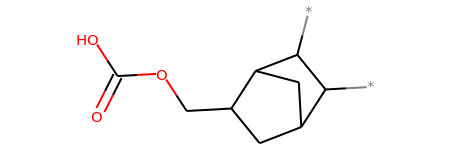

In [13]:
Chem.MolFromSmiles('[*]C1C2CC(COC(=O)O)C(C2)C1[*]')

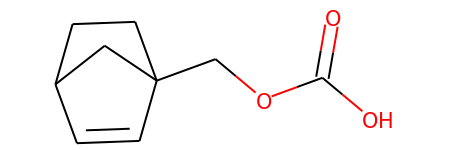

In [14]:
Chem.MolFromSmiles('O=C(O)OCC12C=CC(CC1)C2')

# Make hydrogenate_chain

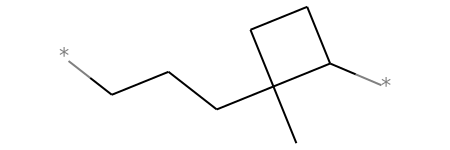

In [2]:
m5 = Chem.MolFromSmiles('*CCCC1(C)CCC1*')
m5

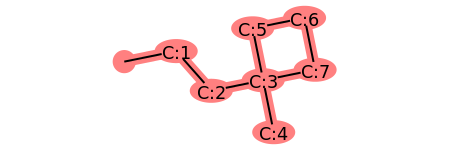

In [15]:
ru.mol_with_atom_index(m5)

In [11]:
patt = Chem.MolFromSmiles('CC')

In [12]:
m5.HasSubstructMatch(patt)

True

In [14]:
m5.GetSubstructMatches(patt)

((0, 1), (1, 2), (2, 3), (3, 4), (3, 5), (3, 7), (5, 6), (6, 7))

In [16]:
m5.GetBonds()

In [34]:
em = Chem.EditableMol(m5)

In [35]:
em.RemoveBond(0,1)
em.AddBond(0,1,Chem.BondType.DOUBLE)

8

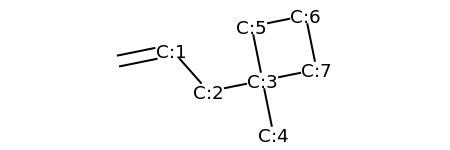

In [37]:
em.GetMol()

In [36]:
Chem.SanitizeMol(em.GetMol())

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

# Test hydrogenate_chain

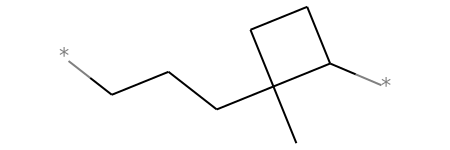

In [2]:
m5 = Chem.MolFromSmiles('*CCCC1(C)CCC1*')
m5

In [3]:
new = hydrogenate_chain(m5)

(1, 2)
(2, 3)
(3, 4)
(4, 5)
(4, 6)
(4, 8)
(6, 7)
(7, 8)


RDKit ERROR: [13:50:36] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [13:50:36] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [13:50:36] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [13:50:36] Explicit valence for atom # 4 C, 5, is greater than permitted


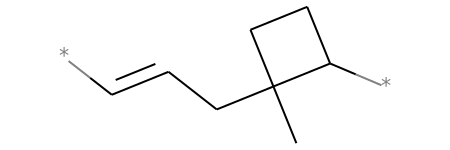

In [4]:
new[0]

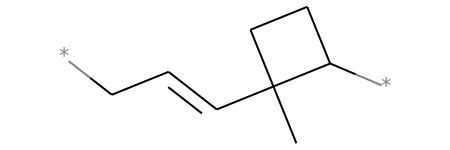

In [5]:
new[1]

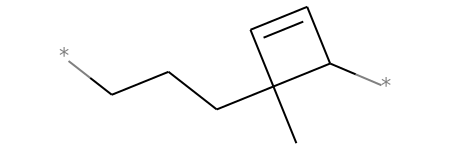

In [6]:
new[2]

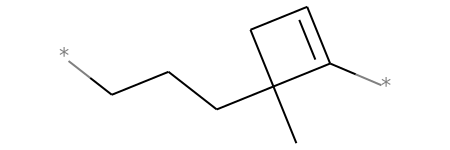

In [7]:
new[3]

In [8]:
new[4]

IndexError: list index out of range

# Make get connector_inds

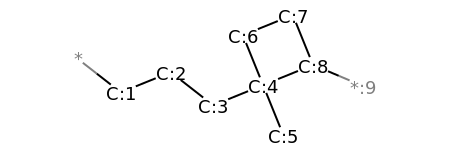

In [17]:
m5 = Chem.MolFromSmiles('*CCCC1(C)CCC1*')
m5

ru.mol_with_atom_index(m5)

In [18]:
a=m5.GetAtoms()

In [19]:
b=a[4]

In [20]:
c=b.GetNeighbors()[0]

In [21]:
c.GetIdx()

3

# Test get_connector_inds

In [22]:
ru.get_connector_inds(m5)

[1, 8]

# Make periodic_mol

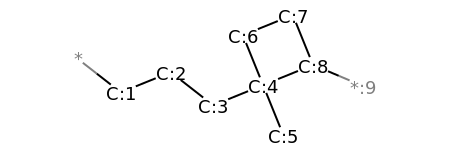

In [11]:
m5 = Chem.MolFromSmiles('*CCCC1(C)CCC1*')
m5

ru.mol_with_atom_index(m5)

In [12]:
p5=ru.LinearPol(m5)

In [13]:
p5.connector_inds

[1, 8]

In [14]:
p5.star_inds

[0, 9]

In [18]:
em = Chem.EditableMol(m5)
em

In [19]:
em.AddBond(p5.connector_inds[0],p5.connector_inds[1],Chem.BondType.SINGLE)
em.RemoveAtom(p5.star_inds[0])
em.RemoveAtom(p5.star_inds[1] - 1)

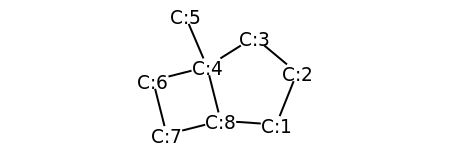

In [21]:
em.GetMol()

# Test PeriodicMol

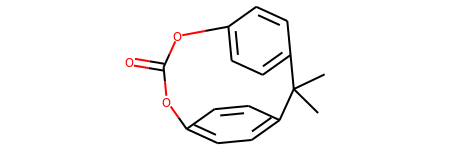

In [25]:
ru.LinearPol(m6).PeriodicMol()

# Make sg_possible

In [26]:
m6 = Chem.MolFromSmiles('*Oc2ccc(C(C)(C)c1ccc(OC(*)=O)cc1)cc2')

In [27]:
def sg_possible(mol):
    possible_patt_smiles = ['CO']
    has_patt = []
    lp = ru.LinearPol(mol)
    pm = lp.PeriodicMol()
    for s in possible_patt_smiles:
        if len(pm.GetSubstructMatches(Chem.MolFromSmiles(s))) > 1:
            has_patt.append(s)
    if len(has_patt) > 0:
        return (True,has_patt)
    else:
        return (False,has_patt)

In [28]:
sg_possible(m6) #should be True

(True, ['CO'])

In [29]:
sg_possible(m5) #should be False

(False, [])

# Make depolymerize

In [32]:
patt = 'CO'

In [30]:
lp = ru.LinearPol(m6)
pm = lp.PeriodicMol()

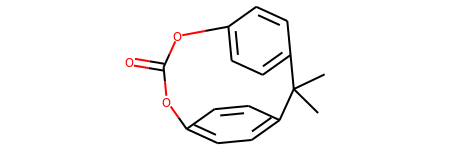

In [31]:
pm

In [33]:
pm.GetSubstructMatches(Chem.MolFromSmiles(patt))

((1, 0), (11, 12), (13, 12), (13, 0))

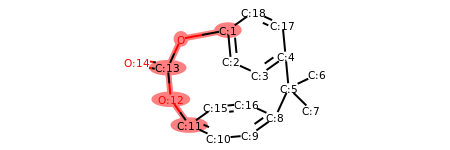

In [34]:
ru.mol_with_atom_index(pm)

In [64]:
em = Chem.EditableMol(pm)

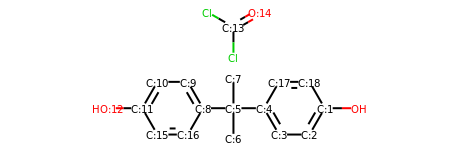

In [65]:
em.RemoveBond(13,0)
em.RemoveBond(13,12)
em.AddAtom(Chem.AtomFromSmiles('[Cl]'))
em.AddAtom(Chem.AtomFromSmiles('[Cl]'))
em.AddBond(13,19,Chem.BondType.SINGLE)
em.AddBond(13,20,Chem.BondType.SINGLE)
m=em.GetMol()
Chem.SanitizeMol(m)

# em = Chem.EditableMol(m)
# em.AddAtom(Chem.AtomFromSmiles('[Cl]'))
# em.AddAtom(Chem.AtomFromSmiles('[Cl]'))
# em.AddBond(13,19,Chem.BondType.SINGLE)
# em.AddBond(13,20,Chem.BondType.SINGLE)
# m=em.GetMol()
# Chem.SanitizeMol(m)
m

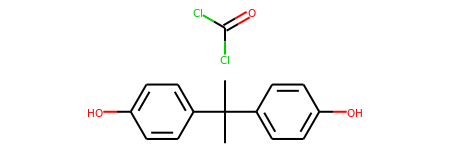

In [96]:
for atom in m.GetAtoms():
    atom.SetAtomMapNum(0)
m

# Test depolymerize

In [62]:
m6 = Chem.MolFromSmiles('*Oc2ccc(C(C)(C)c1ccc(OC(*)=O)cc1)cc2')
patt = 'CO'

lp = ru.LinearPol(m6)
pm = lp.PeriodicMol()

In [65]:
monomer_sets=retro.depolymerize(lp,patt)
monomer_sets

In [66]:
a=monomer_sets[0]

In [67]:
Chem.SanitizeMol(a)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [68]:
Chem.MolToSmiles(a)

'CC(C)(c1ccc(Cl)cc1)c1ccc(Cl)cc1.O=C(O)O'

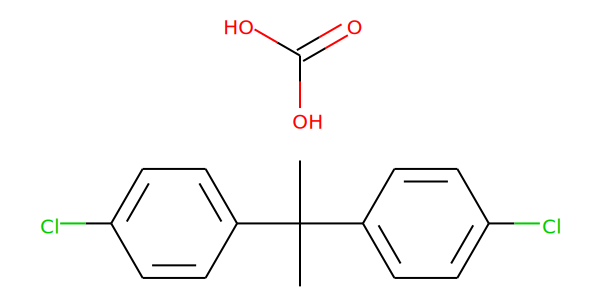

In [69]:
from IPython.display import SVG
SVG(ru.drawFromSmiles('CC(C)(c1ccc(Cl)cc1)c1ccc(Cl)cc1.O=C(O)O'))

# Test depolymerize on data set

In [92]:
success = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/new_polymers_12_43PM_on_June_23_2020_sortedObjective.csv')
success.head()

,SMILES,Bandgap,CIB,Tg,Epoch,ID,afp_C3_C3_C3,afp_C3_C3_C4,afp_C3_C3_H1,afp_C3_C3_N3,afp_C3_C4_C3,afp_C3_C4_C4,afp_C3_C4_Cl1,afp_C3_C4_H1,afp_C3_C4_N2,afp_C3_C4_N3,afp_C3_C4_O2,afp_C3_N2_C3,afp_C3_N2_C4,afp_C3_N3_C4,afp_C3_N3_H1,afp_C3_O2_C3,afp_C3_O2_C4,afp_C3_O2_H1,afp_C4_C3_C4,afp_C4_C3_H1,afp_C4_C3_N2,afp_C4_C3_N3,afp_C4_C3_O1,afp_C4_C3_O2,afp_C4_C4_C4,afp_C4_C4_Cl1,afp_C4_C4_F1,afp_C4_C4_H1,afp_C4_C4_N2,afp_C4_C4_N3,...,mfp_MQNs14,mfp_MQNs15,mfp_MQNs16,mfp_MQNs17,mfp_MQNs18,mfp_MQNs19,mfp_MQNs20,mfp_MQNs21,mfp_MQNs22,mfp_MQNs23,mfp_MQNs24,mfp_MQNs25,mfp_MQNs26,mfp_MQNs27,mfp_MQNs28,mfp_MQNs29,mfp_MQNs30,mfp_MQNs31,mfp_MQNs32,mfp_MQNs33,mfp_MQNs34,mfp_MQNs35,mfp_MQNs36,mfp_MQNs37,mfp_MQNs38,mfp_MQNs39,mfp_MQNs40,mfp_MQNs41,mfp_MQNs42,mfp_NumAliphaticRings,mfp_NumAromaticRings,mfp_tpsa,Uniqueness,n_atoms,main_chain_len,Objective
0,[*]C1C2CCC1C1CC([*])(C)CC21,6.309,3.722,505.582,0,ID_4593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.926,0.0,0.0,1.259,0.0,0.0,...,0.000,0.0,0.444,0.0,0.0,0.074,0.00,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.037,0.00,0.0,0.370,0.0,0.0,0.111,0.00,0.0,0.0,0.0,0.0,0.185,0.111,0.111,0.0,0.000,0.566667,27,6.0,0.020390
1,[*]C1CC2CC1C1CC([*])(C)CC21,6.390,3.722,504.867,0,ID_198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.926,0.0,0.0,1.259,0.0,0.0,...,0.000,0.0,0.444,0.0,0.0,0.074,0.00,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.037,0.00,0.0,0.370,0.0,0.0,0.111,0.00,0.0,0.0,0.0,0.0,0.185,0.111,0.111,0.0,0.000,0.457143,27,6.0,0.016218
2,[*]C1CCC2CC(OC(=O)O)C([*])C1O2,6.578,3.305,576.055,1,ID_2955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040,0.040,0.0,0.0,0.0,0.0,0.0,0.0,0.480,0.0,0.0,0.960,0.0,0.0,...,0.040,0.0,0.400,0.0,0.0,0.080,0.32,0.160,0.0,0.0,0.0,0.0,0.040,0.080,0.040,0.000,0.04,0.0,0.320,0.0,0.0,0.000,0.08,0.0,0.0,0.0,0.0,0.120,0.080,0.080,0.0,0.558,0.422222,25,4.0,0.015142
3,[*]C([*])(C)C1CCCC(C)C1,6.467,3.895,485.356,1,ID_1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.640,0.0,0.0,1.120,0.0,0.0,...,0.000,0.0,0.240,0.0,0.0,0.160,0.00,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.120,0.00,0.0,0.240,0.0,0.0,0.000,0.04,0.0,0.0,0.0,0.0,0.000,0.000,0.040,0.0,0.000,0.678571,25,2.0,0.012242
4,[*]C1CC2CC1C(C([*])OC(=O)O)C2,6.708,3.198,531.194,1,ID_1515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042,0.042,0.0,0.0,0.0,0.0,0.0,0.0,0.667,0.0,0.0,1.083,0.0,0.0,...,0.042,0.0,0.333,0.0,0.0,0.125,0.25,0.125,0.0,0.0,0.0,0.0,0.042,0.083,0.042,0.042,0.00,0.0,0.292,0.0,0.0,0.083,0.00,0.0,0.0,0.0,0.0,0.125,0.083,0.083,0.0,0.485,0.447368,24,5.0,0.012222


In [93]:
len(success)

3556

In [94]:
def test(s):
    return retro.depolymerize(ru.LinearPol(s),'CO')

In [95]:
smiles_ls = success['SMILES'].tolist()
inds = [x for x in smiles_ls if retro.sg_possible(x)[0]]
inds

RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [19:10:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [19:10:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: F

RDKit ERROR: [19:27:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: attempt to add self-bond
RDKit ERROR: Violation occurred on line 309 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: atomIdx1 != atomIdx2
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [19:27:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: attempt to add self-bond
RDKit ERROR: Violation occurred on line 309 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: atomIdx1 != atomIdx2
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [19:27:09] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit E

RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [19:27:10] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [19:27:10] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [19:27:10] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond a

RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [19:27:10] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [19:27:10] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
R

RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [19:27:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [19:27:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
R

RDKit ERROR: 
RDKit ERROR: [19:27:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [19:27:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [19:27:11] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_ar

['[*]C1CCC2CC(OC(=O)O)C([*])C1O2',
 '[*]C1CC2CC1C(C([*])OC(=O)O)C2',
 '[*]C1CC2CC1C([*])(COC(=O)O)C2',
 '[*]C1C2CCC1C([*])(COC(=O)O)C2',
 '[*]C(OC(=O)O)C1CC2CCC1C2[*]',
 '[*]C(OC(=O)O)C1C2CCC(C2)C1[*]',
 '[*]C1C2CCCC(O2)C([*])C1OC(=O)O',
 '[*]C1CCC2OC1CC(OC(=O)O)C2[*]',
 '[*]C1OC(O)C([*])(O)C(C)C1O',
 '[*]C1CC2CC(COC(=O)O)C1C2[*]',
 '[*]C1CC(C2([*])CCOC(O)O2)OC(O)O1',
 '[*]C1CC2CC(OC(=O)O)C([*])C(C1)O2',
 '[*]C1CC2CC1CC2C([*])OC(=O)O',
 '[*]C1CC2C(COC(=O)O)CC1C2[*]',
 '[*]C1COC(O)OC1C1([*])CCOC(O)O1',
 '[*]C1N=C(C2CC(CC3C(C)CC4C5CC(CC5[*])C34)CC2C)OC1=O',
 '[*]C12CCCC([*])(CC(OC(=O)O)C1)O2',
 '[*]C1CC2CC1CC2([*])COC(=O)O',
 '[*]C1CCC2CC([*])(OC(=O)O)CC1O2',
 '[*]C1CC2CC1C(COC(=O)O)C2[*]',
 '[*]CC1(C)C2C(C)C([*])C(C)C2C1(O)O',
 '[*]C1CCC2([*])CC(OC(=O)O)CC1O2',
 '[*]C1C2CC(C(=O)OC)C1C1C(CCC3CCC4C3C3CC4C([*])(C(=O)O)C3)CC(CC)C21',
 '[*]C1C2CC(C(=O)O)C1C1CCC(CCC3CC(CC)C4C5CC(C(=O)OC)C(C5[*])C34)C21',
 '[*]C(OC(=O)O)C1CC2([*])CCC1C2',
 '[*]C1C2CCC1C1C2CC([*])(C)C1CC1CC(C)C(C2=NCC(=O)O2)C1'

In [96]:
inds[0], len(inds)

('[*]C1CCC2CC(OC(=O)O)C([*])C1O2', 1489)

In [97]:
sets = [(s,test(s)) for s in inds if s != None]

In [98]:
success = [x for x in sets if x[1] != []]
len(success)

61

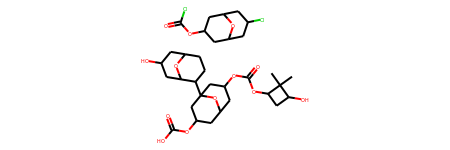

In [108]:
success[24][1][0]

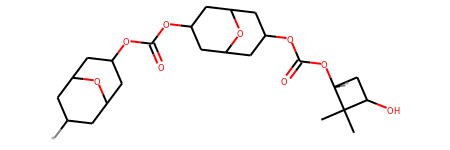

In [104]:
Chem.MolFromSmiles(success[3][0])

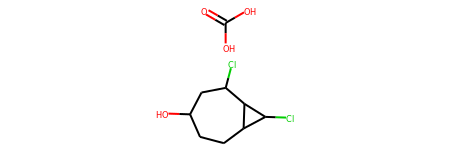

In [55]:
success[0][1]

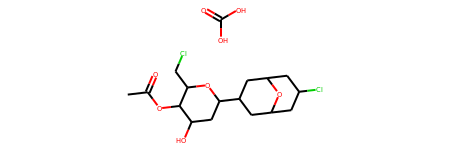

In [60]:
success[220][0]

In [86]:
p6 = ru.LinearPol(m6)
Chem.GetShortestPath(m6,p6.star_inds[0],p6.star_inds[1])

(0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15)

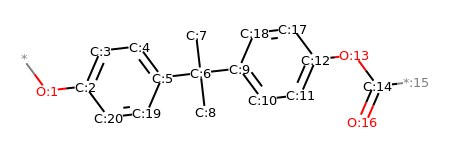

In [88]:
ru.mol_with_atom_index(m6)

# Make symmetry...doesn't work

In [ ]:
x=Chem.MolFromSmiles('c1cc(*)ccc1*')

In [92]:
from rdkit import Chem
from rdkit.Chem import rdmolfiles
import time

def is_symmetric(mol):
    if type(mol) == str:
        mol = Chem.MolFromSmiles(mol)    
    z=list(rdmolfiles.CanonicalRankAtoms(mol, breakTies=False))
    print(z)
    return len(z) != len(set(z))

In [84]:
is_symmetric(x) #should be True

[2, 2, 6, 0, 2, 2, 6, 0]


True

In [85]:
is_symmetric('CO') #should be False

[0, 1]


False

In [86]:
is_symmetric('CC') #should be True

[0, 0]


True

In [87]:
is_symmetric('C1NCN1')

[0, 2, 0, 2]


True

In [97]:
Chem.MolToSmiles(m)

'CC(C)(c1ccc(O)cc1)c1ccc(O)cc1.O=C(Cl)Cl'

In [98]:
is_symmetric('O=C(Cl)Cl')

[0, 3, 1, 1]


True

In [99]:
is_symmetric('CC(C)(c1ccc(O)cc1)c1ccc(O)cc1')

[0, 16, 0, 14, 8, 4, 12, 2, 4, 8, 14, 8, 4, 12, 2, 4, 8]


True

In [100]:
import itertools

In [102]:
list(itertools.combinations([0,1,2], 2))

[(0, 1), (0, 2), (1, 2)]

Check for Rings of type 'CNC(=O)' and 'COC(=O)'

In [2]:
success = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/new_polymers_12_43PM_on_June_23_2020_sortedObjective.csv')
success.head()

len(success)

def test(s):
    return retro.depolymerize(ru.LinearPol(s),'CO')

smiles_ls = success['SMILES'].tolist()

In [17]:
smiles_ls[0]

'[*]C1C2CCC1C1CC([*])(C)CC21'

In [31]:
patt1=Chem.MolFromSmiles('CNC(=O)')
patt2=Chem.MolFromSmiles('COC(=O)')

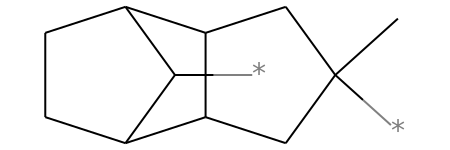

In [32]:
Chem.MolFromSmiles(smiles_ls[0])

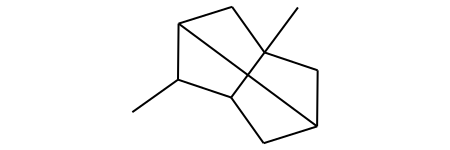

In [33]:
ru.LinearPol(smiles_ls[0]).AlphaMol()

In [50]:
success = []
for i,x in enumerate(smiles_ls):
    try:
        y=ru.LinearPol(x).AlphaMol()
        if len(y.GetSubstructMatches(patt1))==1 or len(y.GetSubstructMatches(patt2))==1:
            success.append(x)
    except:
        pass

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
R

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:41:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: attempt to add self-bond
RDKit ERROR: Violation occurred on line 309 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: atomIdx1 != atomIdx2
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: attempt to add self-bond
RDKit ERROR: Violation occurred on line 309 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/C

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:41:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
R

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond a

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond a

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomI

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
R

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond a

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: attempt to add self-bond
RDKit ERROR: Violation occurred on line 309 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: atomIdx1 != atomIdx2
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed E

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
R

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond a

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: attempt to add self-bond
RDKit ERROR: Violation occurred on line 309 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: atomIdx1 != atomIdx2
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:41:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).s

In [51]:
len(success)

469

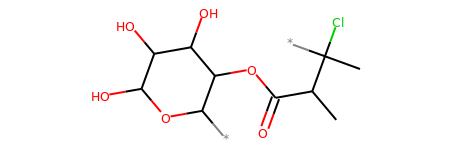

In [53]:
Chem.MolFromSmiles(success[0])

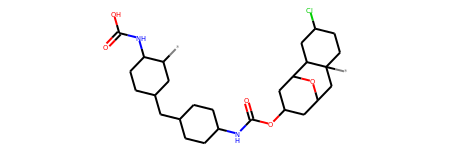

In [62]:
Chem.MolFromSmiles(success[423])

# Test alpha_chain

In [12]:
m8 = Chem.MolFromSmiles('[*]C1OC(C2CC(C)CC(CC(=O)NCC3CCCC(CC(N)=O)C3[*])C2)=NC1C')
p8 = ru.LinearPol(m8)

In [13]:
p8.main_chain_atoms

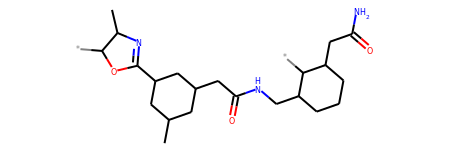

In [14]:
m8

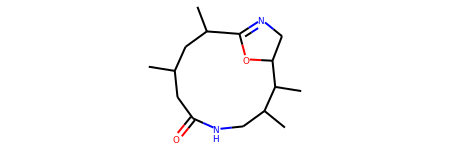

In [23]:
p8.AlphaMol()

# Check for MURI fragment

In [5]:
all_polymers = []
with open('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/results_List/resultsList.txt','r') as f:
    for line in f:
        all_polymers.append(line.strip())

In [6]:
len(all_polymers)

57976

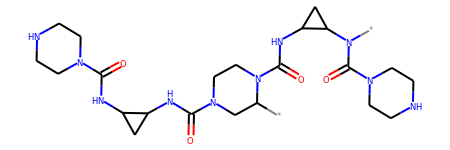

In [50]:
ru.LinearPol(all_polymers[100]).mol

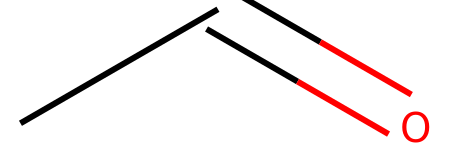

In [57]:
Chem.MolFromSmiles('C(C=O)')

In [58]:
success = []
patt = Chem.MolFromSmiles('C(C=O)')
for i,x in enumerate(all_polymers[0:800]):
    try:
        y=ru.LinearPol(x).PeriodicMol()
        if y.HasSubstructMatch(patt):
            success.append(x)
    except:
        pass

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [17:23:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: attempt to add self-bond
RDKit ERROR: Violation occurred on line 309 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: atomIdx1 != atomIdx2
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:23:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: attempt to add self-bond
RDKit ERROR: Violation occurred on line 309 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: atomIdx1 != atomIdx2
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:23:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit E

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: Violation occurred on line 309 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: atomIdx1 != atomIdx2
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:23:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:23:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:23:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:23:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: attempt to add self-bond
RDKit ERROR: Violation occurred on line 309 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: atomIdx1 != atomIdx2
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [17:23:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts

In [59]:
len(success)

340

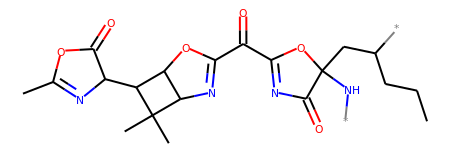

In [61]:
Chem.MolFromSmiles(success[12])

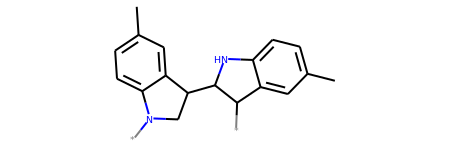

In [34]:
Chem.MolFromSmiles(success[3])

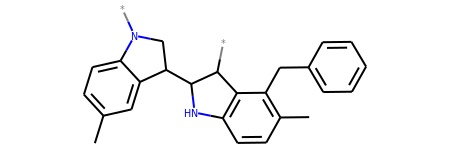

In [35]:
Chem.MolFromSmiles(success[4])

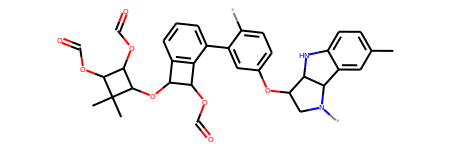

In [36]:
Chem.MolFromSmiles(success[5])

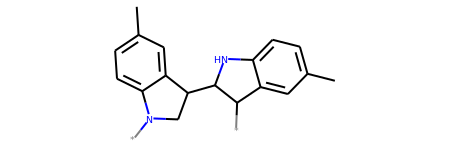

In [37]:
Chem.MolFromSmiles(success[6])

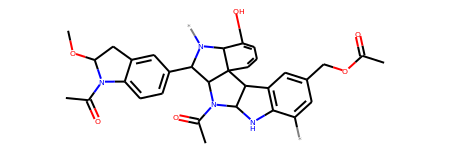

In [38]:
Chem.MolFromSmiles(success[7])

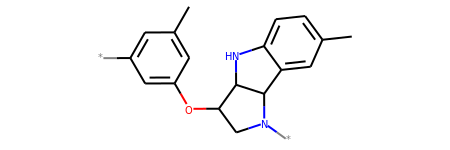

In [39]:
Chem.MolFromSmiles(success[8])

In [ ]:
Chem.MolFromSmiles(success[2])

# Try ADMET depolymerize

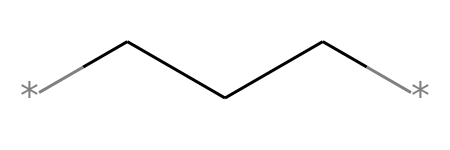

In [38]:
m = Chem.MolFromSmiles('*CCC*')
m

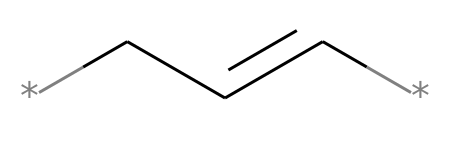

In [9]:
retro.hydrogenate_chain(m)[1]

In [11]:
a=ru.LinearPol(retro.hydrogenate_chain(m)[0])

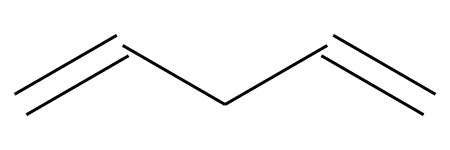

In [40]:
a = retro.admet_depolymerize(ru.LinearPol(retro.hydrogenate_chain(m)[0]))
a

In [ ]:
a.

In [41]:
ru.is_symmetric_chem(a)

RuntimeError: Pre-condition Violation
	getNumImplicitHs() called without preceding call to calcImplicitValence()
	Violation occurred on line 187 in file Code/GraphMol/Atom.cpp
	Failed Expression: d_implicitValence > -1
	RDKIT: 2020.03.2
	BOOST: 1_72


In [14]:
success = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/new_polymers_12_43PM_on_June_23_2020_sortedObjective.csv')
success.head()

len(success)

def test(s):
    return retro.depolymerize(ru.LinearPol(s),'CO')

smiles_ls = success['SMILES'].tolist()

In [33]:
success = []
for i,x in enumerate(smiles_ls):
    try:
        monomer = retro.admet_depolymerize(ru.LinearPol(retro.hydrogenate_chain(x)[0]))
        if ru.is_symmetric_chem(monomer):
            success.append((Chem.MolFromSmiles(x),monomer))
    except:
        pass

RDKit ERROR: [14:12:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:12:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:27] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:27] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:27] Explicit valence for atom # 8 C,

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:27] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:27] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:27] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKi

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:27] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:27] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:27] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKi

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:27] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:27] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:27] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:27] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:27] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:27] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:27] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:27] Explicit valence for atom # 1 C, 5, is great

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:28] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violatio

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:28] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 18

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:28] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit E

RDKit ERROR: [14:25:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for at

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:28] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:28] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:29] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:29] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:29] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 16

RDKit ERROR: [14:25:29] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called w

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:29] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:29] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:29] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKi

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:29] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:29] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:29] Explicit valence for atom # 11 C, 5, is greate

RDKit ERROR: [14:25:30] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called with

RDKit ERROR: [14:25:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:30] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKi

RDKit ERROR: 
RDKit ERROR: [14:25:30] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] 
RDKit ERROR

RDKit ERROR: [14:25:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:30] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/co

RDKit ERROR: [14:25:30] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:30] Explicit valence for atom # 19 C, 5, is greater t

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:31] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding cal

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: attempt to add self-bond
RDKit ERROR: Violation occurred on line 309 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: atomIdx1 != atomIdx2
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: attempt to add self-bond
RDKit ERROR: Violation occurred on line 309 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: atomIdx1 != atomIdx2
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:31] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:

RDKit ERROR: [14:25:31] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for at

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:31] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 7 C, 5, is greater

RDKit ERROR: [14:25:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:31] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:31] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKi

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:32] Explicit valence for atom # 10 C, 5, is greate

RDKit ERROR: [14:25:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:32] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 19 C, 5, is greater

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:32] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ***

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:32] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:32] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 13 C, 5, is grea

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:32] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:33] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] Explicit valence for atom # 12 C, 5, is greate

RDKit ERROR: [14:25:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:33] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit

RDKit ERROR: [14:25:33] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:33] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] Explicit valence for atom # 22 C, 5, is gre

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:33] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:33] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:33] Explicit valence for atom # 16 C, 5, is gre

RDKit ERROR: [14:25:34] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:34] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 10 C, 5, is gre

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:34] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence fo

RDKit ERROR: [14:25:34] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:34] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:34] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKi

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for ato

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:34] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:34] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:34] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKi

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:35] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explici

RDKit ERROR: [14:25:35] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:35] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /ho

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:35] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 29 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 29 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 29 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 29 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence fo

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:35] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:35] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 1 C, 5, is greater

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:35] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:35] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:35] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:35] Explicit valence for atom # 23

RDKit ERROR: [14:25:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:36] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 38 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERRO

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:36] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 15 C, 5, is greater

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:36] Explicit valence for atom # 24 C, 5, is greate

RDKit ERROR: [14:25:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:36] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:36] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding cal

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:37] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 22 C, 5, is gre

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:37] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/G

RDKit ERROR: [14:25:37] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:37] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKi

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:37] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:37] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKi

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:38] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 29 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 29 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 29 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for

RDKit ERROR: [14:25:38] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:38] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 9 C, 5, is greater t

RDKit ERROR: [14:25:38] Explicit valence for atom # 47 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 40 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 47 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 40 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 40 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 40 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:38] Explicit valence for atom # 10 C, 5, is gre

RDKit ERROR: [14:25:38] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: **

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:38] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:38] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:38] Explicit valence for atom # 2 C, 5, is greater

RDKit ERROR: [14:25:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom 

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:39] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:39] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 4 C, 5, is greater th

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:39] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/Gr

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:39] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:39] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKi

RDKit ERROR: [14:25:39] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:39] Explicit valence for a

RDKit ERROR: [14:25:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit 

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:40] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:40] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 5 C, 5, is greater

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:40] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for at

RDKit ERROR: [14:25:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:40] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:40] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:40] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit 

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:41] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, a

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:41] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/co

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:41] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 20 C, 5, is grea

RDKit ERROR: [14:25:41] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:41] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 16 C, 5, is gre

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:41] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 29 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 29 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 29 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 37 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 41 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:41] Explicit valence for

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: 
RDKit ERROR: [14:25:42] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occ

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:42] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom 

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:42] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 23 C, 5, is greater

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:42] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 28 C, 5, is gre

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:42] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:42] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:42] Explicit valence for atom # 21

RDKit ERROR: [14:25:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:43] Explicit valence for atom # 20 C, 5, is greate

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:43] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 6 C,

RDKit ERROR: [14:25:43] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for at

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:43] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom 

RDKit ERROR: [14:25:43] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:43] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:43] Explicit valence for atom # 2 C, 5, is great

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:44] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:44] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 1 C, 5, is greater

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:44] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:44] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:44] Explicit valence for atom # 32 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 32 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 32

RDKit ERROR: [14:25:44] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 32 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for 

RDKit ERROR: [14:25:44] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:44] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:44] Explicit valence for atom # 10 C, 5, is gre

RDKit ERROR: [14:25:45] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 34 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 34 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 34 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 34 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for at

RDKit ERROR: [14:25:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:45] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 1 C, 5, is greater 

RDKit ERROR: [14:25:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:45] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 18 C, 5, is greater

RDKit ERROR: [14:25:45] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RD

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: 
RDKit ERROR: [14:25:45] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_15891010

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:46] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for at

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:46] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 38 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 38 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 38 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] 
RDKit ERROR: 
RDKi

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:46] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 37 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 37 C, 5, is greater

RDKit ERROR: 
RDKit ERROR: [14:25:46] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit 

RDKit ERROR: [14:25:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:46] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 20 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:46] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERRO

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:47] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 31 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 42 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for at

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:47] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 38 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 38 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 38 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 38 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence fo

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:47] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:47] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:47] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERRO

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:48] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: 

RDKit ERROR: [14:25:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:48] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKi

RDKit ERROR: [14:25:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:48] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 29 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 26 C, 5, is greater

RDKit ERROR: [14:25:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:48] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 28 C, 5, is gre

RDKit ERROR: [14:25:48] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:48] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:48] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:48] Explicit valence for atom # 2 C

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:49] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 39 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 39 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 39 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for a

RDKit ERROR: [14:25:49] Explicit valence for atom # 31 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 31 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 31 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 31 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:49] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 5 C, 5, is greate

RDKit ERROR: [14:25:49] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 29 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 29 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for ato

RDKit ERROR: [14:25:49] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:49] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:49] Explicit valence for atom # 26 C, 5, is gre

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:50] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 16 C, 5, is greate

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:50] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 37 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 49 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/co

RDKit ERROR: [14:25:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:50] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre

RDKit ERROR: [14:25:50] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:50] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 41 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 41 C, 5, is greater than permitted
RDKit ERROR: [14:25:50] Explicit valence for atom # 30 C, 5, is gre

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:51] Explicit valence for atom # 31 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 31 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 31 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 31 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 13 C, 5, is gre

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:51] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom 

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:51] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 33 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 22 

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:51] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit

RDKit ERROR: [14:25:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:51] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:51] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKi

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:52] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for 

RDKit ERROR: [14:25:52] Explicit valence for atom # 33 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 45 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: **

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:52] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for at

RDKit ERROR: [14:25:52] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:52] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for at

RDKit ERROR: [14:25:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 31 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 31 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 31 C, 5, is greater

RDKit ERROR: [14:25:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater th

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called witho

RDKit ERROR: [14:25:53] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 31 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 31 C, 5, is greater than permitted
RDKit ERROR: [14:25:53] Explicit valence for atom # 31 C, 5, is greater

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:54] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 34 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for at

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:54] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 34 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 37 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Cod

RDKit ERROR: [14:25:54] Explicit valence for atom # 49 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:54] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 15 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/co

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:54] Explicit valence for atom # 42 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 35 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 47 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:54] Explicit valence for a

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:55] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] 
RDKit ERROR: 
RDKi

RDKit ERROR: [14:25:55] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:55] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 16 C, 5, is grea

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:55] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:55] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 34 C, 5, is gre

RDKit ERROR: [14:25:55] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:55] Explicit valence for atom # 10 C, 5, is greate

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:56] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 26 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 34 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 37 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Cod

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:56] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 39 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 39 C, 5, is gre

RDKit ERROR: [14:25:56] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 41 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 41 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 41 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 41 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:56] Explicit valence for ato

RDKit ERROR: [14:25:57] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for at

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:57] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 35 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 49 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for a

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:57] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:57] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:57] Explicit valence for atom # 28 C, 5, is greater

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:58] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 5 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 12 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: attempt to add self-bond
RDKit ERROR: Violation occurred on line 309 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: 

RDKit ERROR: [14:25:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:58] Explicit valence for atom # 39 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 13 C, 5, is greater than permitted
RDKi

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:58] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 25 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 30 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKi

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:58] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence fo

RDKit ERROR: [14:25:58] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 4 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:58] Explicit valence for at

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:59] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 17 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 36 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:59] Explicit valence for atom # 3 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 9 C,

RDKit ERROR: [14:25:59] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 24 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:25:59] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 19 C, 5, is great

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:25:59] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] Explicit valence for atom # 10 C, 5, is greater than permitted
RDKit ERROR: [14:25:59] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:26:00] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 21 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 19 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 46 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 1 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] 
RDKit ERROR: 
RDKit E

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:26:00] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 18 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 32 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 8 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 32 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 32 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 27 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] 
RDKit ERROR: 
RDKit E

RDKit ERROR: [14:26:00] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 9 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 23 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 37 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 49 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:26:00] Explicit valence for atom # 2 C, 5, is greater

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:26:00] Explicit valence for atom # 45 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 45 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 61 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:26:00] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)

!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:26:00] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 2 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 6 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom # 14 C, 5, is greater than permitted
RDKit ERROR: [14:26:00] Explicit valence for atom #

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:26:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: getNumImplicitHs() called without preceding call to calcImplicitValence()
RDKit ERROR: Violation occurred on line 187 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/Atom.cpp
RDKit ERROR: Failed Expression: d_implicitValence > -1
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:26:01] Explicit valence for atom # 39 C, 5, is greater than permitted
RDKit ERROR: [14:26:01] Explicit valence for atom # 39 C, 5, is greater than permitted
RDKit ERROR: [14:26:01] Explicit valence for atom # 39 C, 5, is greater than permitted
RDKit ERROR: [14:26:01] Explicit valence for atom # 39 C, 5, is greater than permitted
RDKit ERROR: [14:26:01] Explicit valence for atom # 16 C, 5, is greater than permitted
RDKit ERROR: [14:26:01] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [14:26:01] Explicit valence for atom # 28 C, 5, is gre

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:26:01] Explicit valence for atom # 22 C, 5, is greater than permitted
RDKit ERROR: [14:26:01] Explicit valence for atom # 34 C, 5, is greater than permitted
RDKit ERROR: [14:26:01] Explicit valence for atom # 46 C, 5, is greater than permitted
RDKit ERROR: [14:26:01] Explicit valence for atom # 57 C, 5, is greater than permitted
RDKit ERROR: [14:26:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:26:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol

!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!


RDKit ERROR: [14:26:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:26:01] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [14:26:01] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:26:01] Explicit valence for atom # 11 C, 5, is greater than permitted
RDKit ERROR: [14:26:01] Explicit valence for atom # 11

In [34]:
rm_none = [x for x in success if x[1] != None]

In [35]:
len(success)

0

In [36]:
len(rm_none)

0

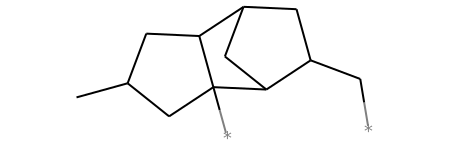

In [27]:
rm_none[0][0]

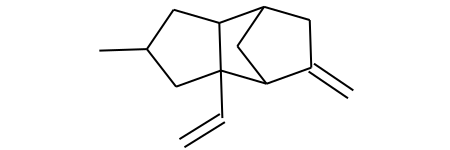

In [28]:
rm_none[0][1]

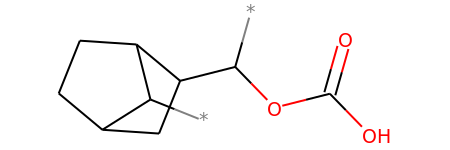

In [29]:
rm_none[1][0]

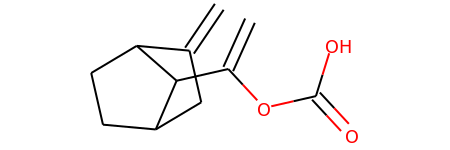

In [30]:
rm_none[1][1]

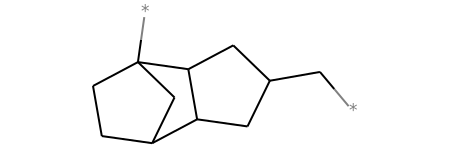

In [31]:
rm_none[2][0]

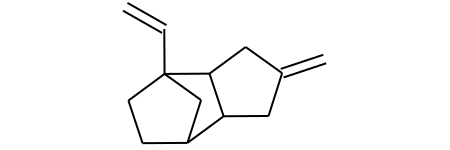

In [32]:
rm_none[2][1]